# **MODELLING AND EVALUATION NOTEBOOK**

## Objectives

*   The objective of this notebook is to answer the following business requirement: 
    *  2 - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs

The inputs for this notebook are as follows:
* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/validation
* inputs/mildew_dataset/cherry-leaves/test
* image shape embeddings

## Outputs
* Images distribution plot in train, validation, and test sets
* Augmented images
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Saved model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file

## Additional Comments | Insights | Conclusions

* No comments.

---

# Set Data Directory

## Import libraries

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Set working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/ci-portfolio-five/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new working directory

In [6]:
work_dir = os.getcwd()
work_dir

'/workspace/ci-portfolio-five'

## Set input directories

Set input directories for train, validation and test paths.

In [7]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

Set the output directory and create a subdirectory to store different versions of output.

In [8]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set label names

The labels are set based on the names of the subfolders in the train folder.

In [9]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['healthy', 'powdery_mildew']


## Set image shape

Set image shape from the embedding pickle file.

In [10]:
## Import saved image shape embedding
import joblib

version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images in train, test and validation data

* Explore the number of images in the train, validation and test sets.
* Plot a bar graph to visualise the number of images.

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




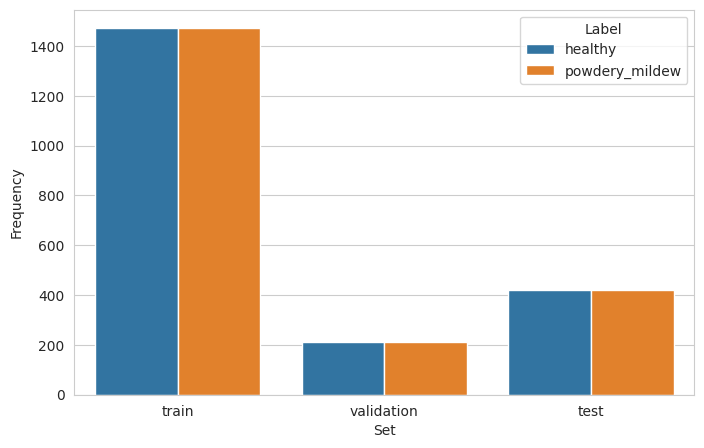

In [16]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Image data augmentation

The train set contains 1,472 images for each healthy leaves and leaves with powdery mildew categories. This not suffiient for a deep nueral network learning model. We will use image augmentation to increase the number of images in the dataset.

### Import ImageDataGenerator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* ### Initialize ImageDataGenerator

In [24]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                        width_shift_range=0.10,
                                        height_shift_range=0.10,
                                        shear_range=0.1,
                                        zoom_range=0.1,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='nearest',
                                        rescale=1./255
                                        )

* ### Augment training image dataset

In [25]:
batch_size = 20  # Set batch size

train_set = augmented_image_data.flow_from_directory(train_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=True
                                                    )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment validation image dataset

In [26]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment test image dataset

In [27]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                target_size=image_shape[:2],
                                                                color_mode='rgb',
                                                                batch_size=batch_size,
                                                                class_mode='binary',
                                                                shuffle=False
                                                                )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(20, 256, 256, 3)


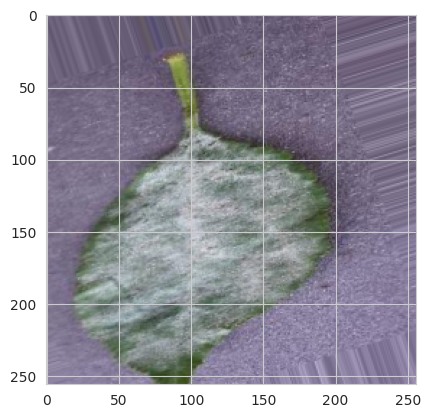

(20, 256, 256, 3)


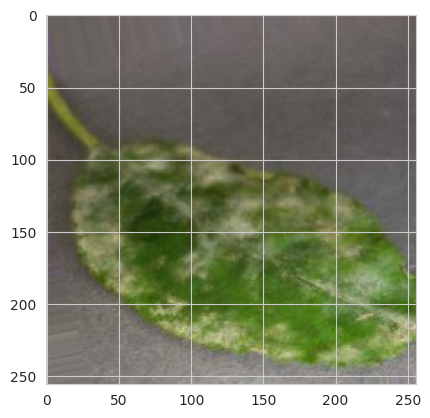

(20, 256, 256, 3)


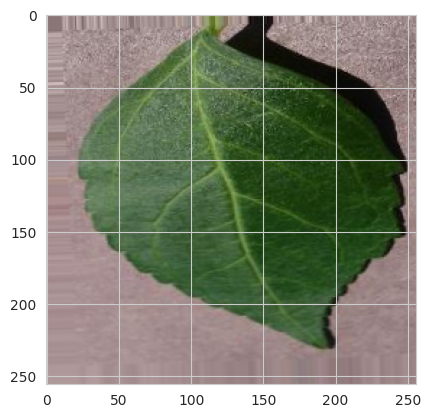

In [18]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation images

(20, 256, 256, 3)


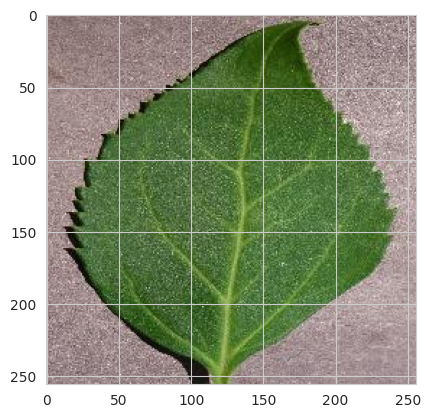

(20, 256, 256, 3)


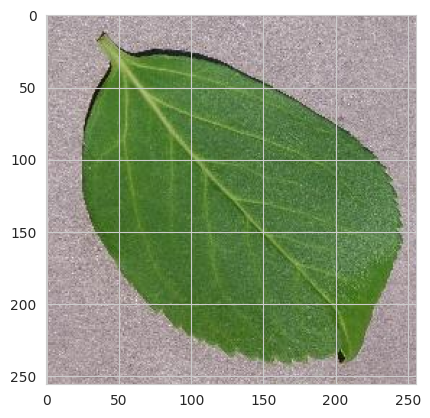

(20, 256, 256, 3)


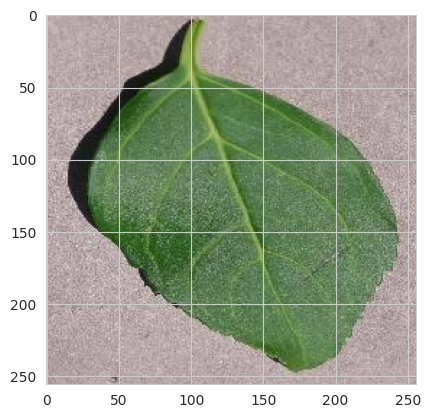

In [19]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented test images

(20, 256, 256, 3)


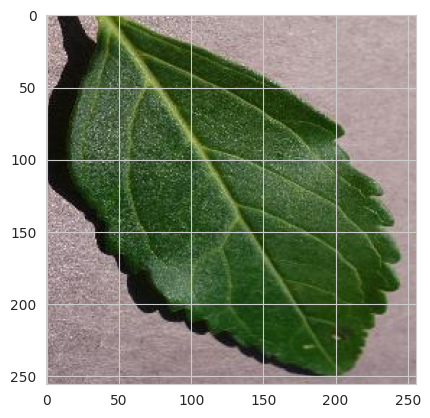

(20, 256, 256, 3)


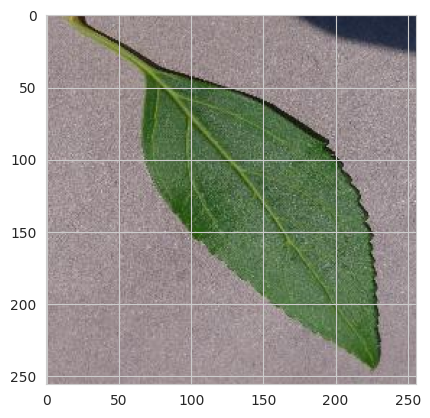

(20, 256, 256, 3)


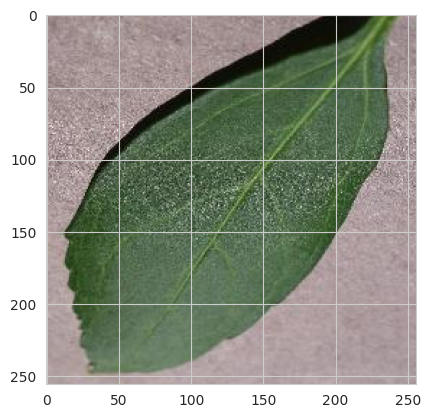

In [20]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [44]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model creation

## ML model

* ### Import model packages

Import the Sequential model and layers from TensorFlow API

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

* ### Model 

The following CNN model is created to handle a binary classification task:

* Layers:
    * Convolution layers are used to select the dominant pixel value from the non-dominant pixels in images using filters.
    * Pooling layers reduce the image size by extracting only the dominant features from the image.
    * Three sets of pairs of Convolutional and Pooling (max pooling) layers are used to allow the networks to discover patterns within patterns and reduce complexity.
    * The Flatten layer is used to flatten the matrix into a vector, which is fed into a dense layer.
    * the Dropout out layer randomly switches off 50% of the previous layer's neurons in every training iteration
* Activation functions:
    * ReLU activation function was used for hidden layers as it is commonly used in the industry.
    * Sigmoid function is used as an activation function for the output layer as it is appropriate for binary classification tasks.
* Loss Function and Optimizer
    * `binary_crossentropy` loss is selected as this is considered as the standard loss function for binary classification problems.
    * `Adam` was chosen because it showed to be effective when compared to other options.


In [39]:
def create_tf_model():
    # instantiate sequential model
    model = Sequential()

    # 1st convolution and max pooling
    model.add(Conv2D(filters=16, kernel_size=(3, 3),
                    input_shape=image_shape, activation='relu')) # Input layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd convolution and max pooling
    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3d convolution and max pooling
    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(1, activation='sigmoid')) # Output layer

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    return model

* ### Model Summary

In [40]:
create_tf_model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)            

* ### Early Stopping

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Fit model for model training

In [29]:
model = create_tf_model()
model.fit(train_set,
          epochs=20,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/20
147/147 [==============================] - 83s 559ms/step - loss: 0.2670 - accuracy: 0.8776 - val_loss: 0.0130 - val_accuracy: 0.9952
Epoch 2/20
147/147 [==============================] - 96s 656ms/step - loss: 0.0493 - accuracy: 0.9839 - val_loss: 0.0345 - val_accuracy: 0.9929
Epoch 3/20
147/147 [==============================] - 111s 752ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0112 - val_accuracy: 0.9952
Epoch 4/20
147/147 [==============================] - 93s 633ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0635 - val_accuracy: 0.9833
Epoch 5/20
147/147 [==============================] - 146s 995ms/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/20
147/147 [==============================] - 146s 986ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0305 - val_accuracy: 0.9905
Epoch 7/20
147/147 [==============================] - 74s 504ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 7.8514e-04 -

## Save model

In [30]:
model.save('outputs/v1/mildew_detector_model.h5')

---

# Model Performace

## Model learning curve

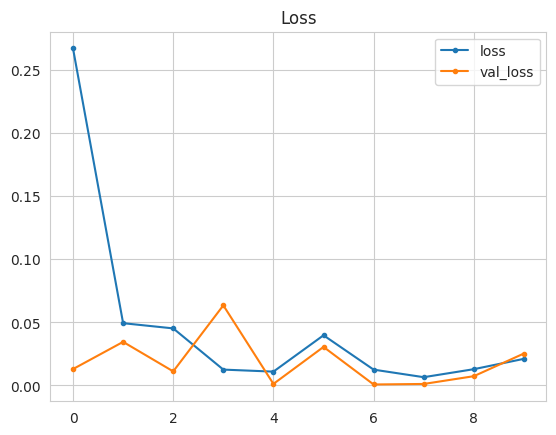

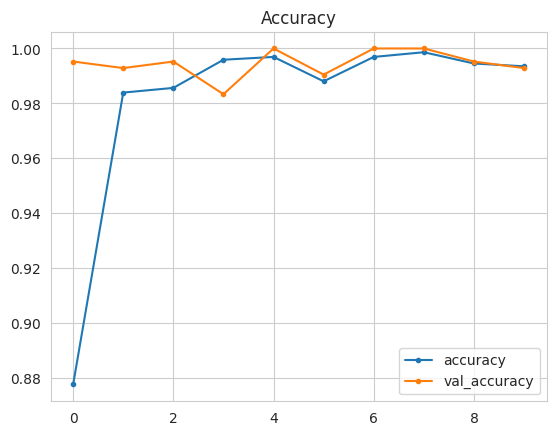

In [31]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

Load saved model

In [32]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detector_model.h5')

Evaluate model on test set

In [33]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 12s 267ms/step - loss: 0.0243 - accuracy: 0.9953


### Save evaluation pickle

In [34]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

## Predict on new data

Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


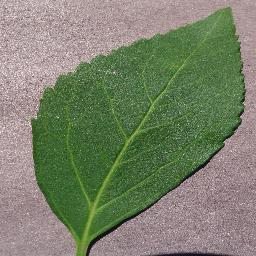

In [35]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]  # select healthy or powdery mildew

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


Convert image to array and prepare for prediction

In [36]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [37]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9932080209255219
healthy


# Push files to Repo